# Bima Surya Nurwahid
# M 06
# m183x0325
 Universitas Amikom Yogyakarta

#Setting Kaggle

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bimasuryan","key":"1e6710fbb164f1669b8f3b0e26d86b8f"}'}

In [2]:
# Library 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from os.path import join

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#Import Dataset

In [4]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 72% 18.0M/25.0M [00:00<00:00, 36.2MB/s]
100% 25.0M/25.0M [00:00<00:00, 41.7MB/s]


In [5]:
!unzip '/content/anime-recommendations-database.zip'

Archive:  /content/anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [6]:
anime = pd.read_csv('/content/anime.csv')
anime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
anime.shape

(12294, 7)

In [8]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [9]:
anime = anime.drop(columns=['anime_id'])

In [10]:
anime.head(20)

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


#Eksploratory Data Analysis

In [11]:
def printByInformation(dataset, option=False):
  if option:
    pd.set_option('display.max_columns',None)
    print(f'current rows:{dataset.shape[0]}')
    print(f'current col:{dataset.shape[1]}')
    print('======================DATA CLEANING=======================================')
    print(f'jumlah NaN {dataset.isnull().sum().sum()} dari NaN yg ditemukan')
    print(f'jumlah NaN tiap Column\n{dataset.isnull().sum()}')
    print(f'Name Columns: {list(dataset.columns)}')
    print(f'{dataset.info()}')
    print(f'{dataset.describe()}')
printByInformation(anime,True)

current rows:12294
current col:6
======================DATA CLEANING=======================================
jumlah NaN 317 dari NaN yg ditemukan
jumlah NaN tiap Column
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
Name Columns: ['name', 'genre', 'type', 'episodes', 'rating', 'members']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 576.4+ KB
None
             rating       members
count  12064.000000  1.229400e+04
mean       6.473902  1.807134e+04
std        1.026746  5.482068e+04
min        1.670000  5.00

In [12]:
print('This is a list of genres: ', anime.genre.unique())

This is a list of genres:  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


#Data Cleaning

In [13]:
null_features = anime.columns[anime.isna().any()]
anime[null_features].isna().sum()

genre      62
type       25
rating    230
dtype: int64

In [14]:
anime.dropna(inplace=True)
anime[null_features].isna().sum()

genre     0
type      0
rating    0
dtype: int64

#Data Preprocessing

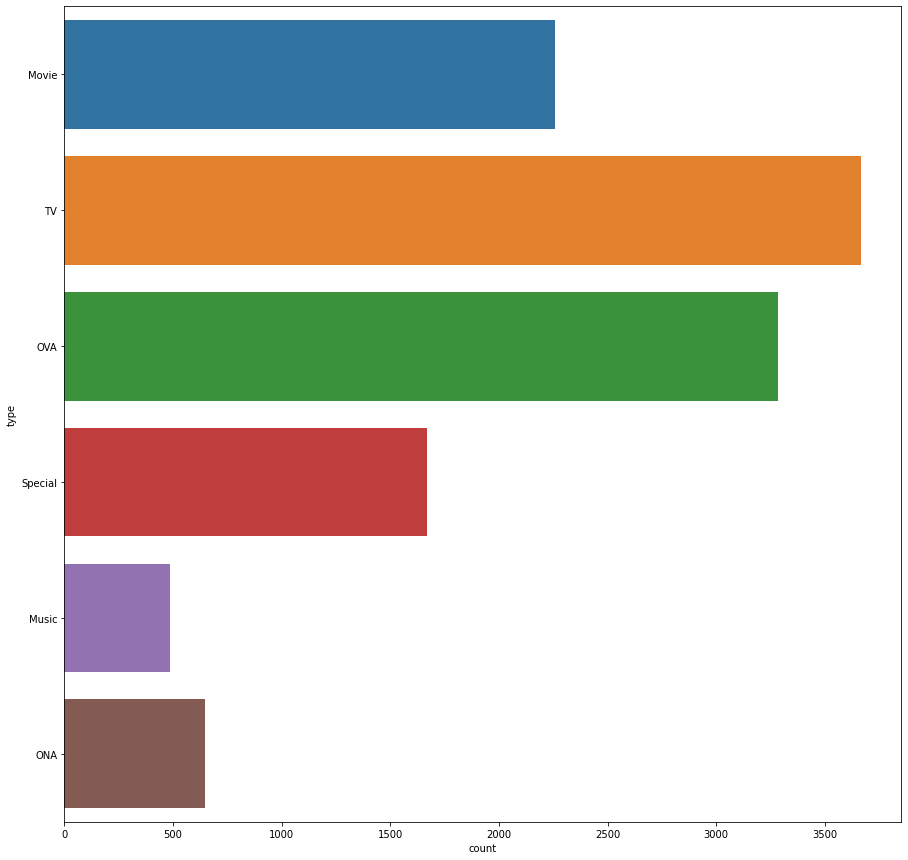

In [15]:
plt.figure(figsize=(15,15))
sns.countplot(y=anime['type'])
plt.show()

In [16]:
anime.drop_duplicates(subset='name',inplace=True)

#Modelling

In [17]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(anime['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [18]:
# Melakukan fit lalu ditransformasikan ke dalam bentuk matrix
tfidf_matrix = tf.fit_transform(anime['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(12015, 47)

In [19]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29500416, 0.3163137 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25161762, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [20]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=anime.name
).sample(22, axis=1).sample(10, axis=0)

,yuri,dementia,action,power,super,magic,martial,sci,josei,historical,ai,music,police,of,cars,hentai,harem,school,space,drama,supernatural,mecha
name,,,,,,,,,,,,,,,,,,,,,,
Denki-gai no Honya-san,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.451277,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Deltora Quest,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Zero Sum Game: Sex Crime,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Ao no Exorcist,0.0,0.0,0.328734,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.464075,0.000000
Kowaku no Toki,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Genma Taisen: Shinwa Zenya no Shou,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.328765,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.332307,0.412827,0.000000
Ane Jiru The Animation: Shirakawa Sanshimai ni Omakase,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Micro Teukgongdae Diatron 5,0.0,0.0,0.335747,0.0,0.0,0.0,0.0,0.377461,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.606588,0.000000,0.000000,0.484118
Shoujo kara Shoujo e...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [21]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14718913, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14718913, 1.        , 0.17876073, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17876073, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [22]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa name anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['name'], columns=anime['name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12015, 12015)


name,Cooking Papa,Hidamari Sketch x 365 Recap,Kyoto Animation: Hoshi-hen,Mini Moni Yaru no da Pyon!,Minihams no Ai no Uta
name,,,,,
Towa no Quon 3: Mugen no Renza,0.000000,0.000000,0.000000,0.000000,0.000000
Mo Jing Lieren 2nd Season,0.000000,0.000000,0.711405,0.000000,0.000000
Kuroshitsuji II Specials,0.089450,0.078383,0.374841,0.275041,0.000000
Himiko-den,0.000000,0.000000,0.458172,0.000000,0.000000
Ranpo Kitan: Game of Laplace,0.000000,0.000000,0.000000,0.000000,0.000000
Arisa☆Good Luck,0.202609,0.177540,0.000000,0.622982,0.000000
Fullmetal Alchemist: Brotherhood - 4-Koma Theater,0.090978,0.079721,0.381243,0.279739,0.000000
Chii-chan to Hige Ojisan,0.836281,0.732808,0.000000,0.000000,0.297059
Chouyaku Hyakuninisshu: Uta Koi. - Sake to Kikoushi ~ Murasaki Kishikibu to Kintou,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
def anime_recom(anime_name, similarity_data=cosine_sim_df, items=anime[['name', 'genre', 'episodes', 'rating']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar/tertinggi dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop name anime agar name yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [24]:
anime[anime['name'] == 'Shigatsu wa Kimi no Uso']

,name,genre,type,episodes,rating,members
16,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397


In [25]:
anime_recom('Shigatsu wa Kimi no Uso')

,name,genre,episodes,rating
0,D.C.III: Da Capo III Special,"Drama, Music, Romance, School",1,6.49
1,Kimi no Iru Machi: Tasogare Kousaten,"Drama, Romance, School, Shounen",2,7.33
2,Shinkyoku Soukai Polyphonica Crimson S,"Drama, Fantasy, Music, Romance, School",12,7.33
3,Chiisana Love Letter: Mariko to Nemunoki no Ko...,"Drama, Music, School",1,5.57
4,Hibike! Euphonium: Kakedasu Monaka,"Drama, Music, School",1,7.50


In [26]:
anime[anime['name'] == 'Gintama']

,name,genre,type,episodes,rating,members
12,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376


In [27]:
anime_recom('Gintama')

,name,genre,episodes,rating
0,Gintama: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",1,8.31
1,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",2,8.60
2,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",1,9.10
3,Gintama Movie: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",1,8.59
4,Gintama: Jump Festa 2014 Special,"Action, Comedy, Historical, Parody, Samurai, S...",1,8.20


**DONE**

In [28]:
anime[anime['name'] == 'One Piece']

,name,genre,type,episodes,rating,members
74,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862


In [29]:
anime_recom('One Piece')

,name,genre,episodes,rating
0,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,8.27
1,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,7.78
2,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,8.29
3,One Piece: Oounabara ni Hirake! Dekkai Dekkai ...,"Action, Adventure, Comedy, Fantasy, Shounen, S...",1,7.43
4,One Piece Movie 5: Norowareta Seiken,"Action, Adventure, Comedy, Fantasy, Shounen, S...",1,7.44
